# Experimenting with k-means and the EM algorithm for clustering high and low network traffic patterns

In [21]:
%matplotlib inline

import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import cluster, linear_model
from scipy import stats

plt.style.use('ggplot')

Simulate network usage data, with higher traffic during work hours and lower traffic elsewhere

In [22]:
# we will simulate hourly data over 2 weeks
hours = range(1, 25)  # 1-24
days = range(1, 8)  # 1-7
weeks = range(1, 2)  # 1-2
total_hours = range(1, (len(hours) * len(days) * len(weeks)) + 1)

usage = []
for week in weeks:
    for day in days:
        for hour in hours:
            if 8 < hour < 16:
                # get a large random number from a normal distribution
                # during work hours
                usage_this_hour = np.random.normal(loc=800, scale=200)
            else:
                # get a small random number from an exponential distrbution
                usage_this_hour = np.random.exponential(scale=50)
            usage.append(usage_this_hour)
            
usage = np.array(usage)
total_hours = np.array(total_hours)

Plot the data

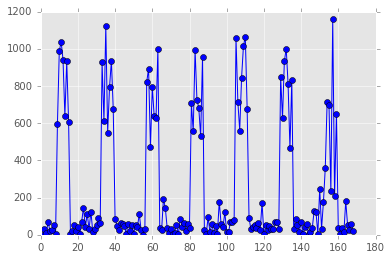

In [23]:
plt.plot(total_hours, usage, 'b-o')

(array([ 84.,  23.,   8.,   4.,   2.,   0.,   1.,   1.,   1.,   4.,   6.,
          6.,   4.,   3.,   4.,   2.,   5.,   6.,   2.,   2.]),
 array([    1.48310706,    59.44361527,   117.40412348,   175.36463169,
          233.3251399 ,   291.28564811,   349.24615632,   407.20666453,
          465.16717274,   523.12768096,   581.08818917,   639.04869738,
          697.00920559,   754.9697138 ,   812.93022201,   870.89073022,
          928.85123843,   986.81174664,  1044.77225485,  1102.73276306,
         1160.69327127]),
 <a list of 20 Patch objects>)

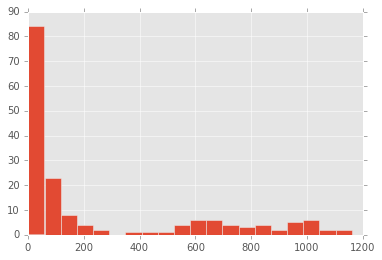

In [24]:
plt.hist(usage, bins=20)

## K-means approach

In [25]:
usage_mat = []
for h, u in zip(total_hours, usage):
    usage_mat.append([h, u])
usage_mat = np.array(usage_mat)

In [26]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(usage_mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [27]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [28]:
k_means.cluster_centers_

array([[  86.45081967,   56.20316496],
       [  79.32608696,  792.19019638]])

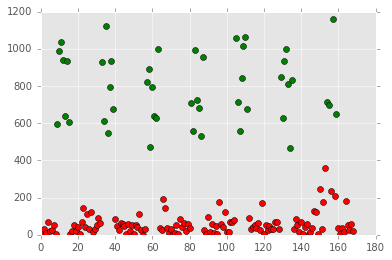

In [29]:
high_usage = usage[k_means.labels_ == 1]
high_hours = total_hours[k_means.labels_ == 1]
low_usage = usage[k_means.labels_ == 0]
low_hours = total_hours[k_means.labels_ == 0]
plt.plot(high_hours, high_usage, 'go')
plt.plot(low_hours, low_usage, 'ro')

Do a linear regression through the high traffic points

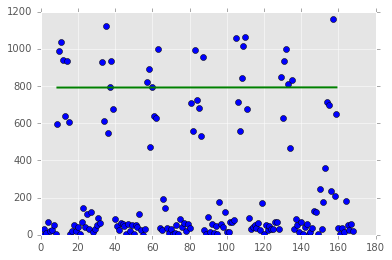

In [32]:
regr = linear_model.LinearRegression()
slope, intercept = stats.linregress(high_hours, high_usage)[:2]

plt.plot(total_hours, usage, 'bo')
plt.plot(high_hours, intercept + slope*high_hours, 'g-', linewidth=2)

Compare a mean through all the points to a mean through only the high traffic cluster

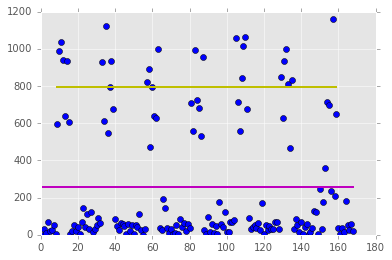

In [33]:
upper_avg = np.repeat(a=np.mean(high_usage), repeats=len(high_usage))
total_avg = np.repeat(a=np.mean(usage), repeats=len(usage))
plt.plot(total_hours, usage, 'bo')
plt.plot(total_hours, total_avg, 'm-', linewidth=2)
plt.plot(high_hours, upper_avg, 'y-', linewidth=2)

## Gaussian mixture model approach